In [43]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [44]:
data

['t_n55          8.9193 ( 7.8488, 10.4407) ( 7.7183, 10.2295)  2.5112 (Jnode 106)\n',
 't_n56          8.6338 ( 7.7039,  9.9058) ( 7.6247,  9.7642)  2.1395 (Jnode 105)\n',
 't_n57          8.1552 ( 7.3378,  9.2942) ( 7.2935,  9.2106)  1.9171 (Jnode 104)\n',
 't_n58          6.9742 ( 6.4170,  7.8584) ( 6.3455,  7.7525)  1.4070 (Jnode 103)\n',
 't_n59          6.7554 ( 6.2278,  7.6063) ( 6.1867,  7.5325)  1.3458 (Jnode 102)\n',
 't_n60          6.4484 ( 5.9390,  7.2611) ( 5.8954,  7.1841)  1.2887 (Jnode 101)\n',
 't_n61          5.9776 ( 5.4689,  6.7514) ( 5.4223,  6.6796)  1.2573 (Jnode 100)\n',
 't_n62          2.5491 ( 1.6520,  3.4721) ( 1.6528,  3.4725)  1.8198 (Jnode 99)\n',
 't_n63          4.0511 ( 3.3189,  4.8182) ( 3.3116,  4.8087)  1.4971 (Jnode 98)\n',
 't_n64          2.8399 ( 2.1928,  3.5309) ( 2.1690,  3.5004)  1.3314 (Jnode 97)\n',
 't_n65          2.4897 ( 1.8937,  3.1308) ( 1.8797,  3.1162)  1.2365 (Jnode 96)\n',
 't_n66          1.9129 ( 1.4190,  2.4696) ( 1.4055,  2.44

In [45]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [46]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [47]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [48]:
posterior_mean_iqtree

[8.9193,
 8.6338,
 8.1552,
 6.9742,
 6.7554,
 6.4484,
 5.9776,
 2.5491,
 4.0511,
 2.8399,
 2.4897,
 1.9129,
 1.2807,
 0.8486,
 0.3629,
 2.9782,
 6.5956,
 6.3977,
 5.9622,
 4.145,
 3.7058,
 3.1905,
 6.4028,
 6.1193,
 5.9297,
 5.5739,
 5.107,
 4.9665,
 4.2979,
 3.9045,
 3.5702,
 2.6438,
 2.4384,
 4.3334,
 3.4811,
 6.2849,
 1.2676,
 6.1465,
 5.7487,
 5.0924,
 4.7213,
 3.4212,
 3.9453,
 4.8887,
 4.7124,
 4.3902,
 3.135,
 4.2452,
 7.3966,
 5.554,
 3.379,
 2.4656,
 6.1559]

In [49]:
lower_ci_iqtree

[]

In [50]:
upper_ci_iqtree

[]

In [51]:
file_LG = open("LG_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [53]:
posterior_mean_baseml

[10.5517,
 10.2194,
 9.0969,
 7.6467,
 7.2285,
 6.7209,
 5.9935,
 2.8739,
 4.2142,
 2.9634,
 2.4874,
 1.8592,
 1.2256,
 0.8095,
 0.345,
 3.1082,
 6.8085,
 5.6188,
 6.0189,
 4.2701,
 3.618,
 3.4858,
 6.8442,
 6.3389,
 5.9925,
 5.5604,
 5.0086,
 4.7277,
 3.9932,
 3.5146,
 3.0798,
 2.2878,
 1.9412,
 4.1663,
 3.2391,
 6.5665,
 1.711,
 6.2833,
 5.72,
 4.9109,
 4.3763,
 3.1408,
 3.386,
 4.7469,
 4.3172,
 3.6455,
 3.1343,
 4.1039,
 7.9701,
 5.9345,
 3.6057,
 3.1978,
 7.588]

In [54]:
posterior_mean_iqtree

[8.9193,
 8.6338,
 8.1552,
 6.9742,
 6.7554,
 6.4484,
 5.9776,
 2.5491,
 4.0511,
 2.8399,
 2.4897,
 1.9129,
 1.2807,
 0.8486,
 0.3629,
 2.9782,
 6.5956,
 6.3977,
 5.9622,
 4.145,
 3.7058,
 3.1905,
 6.4028,
 6.1193,
 5.9297,
 5.5739,
 5.107,
 4.9665,
 4.2979,
 3.9045,
 3.5702,
 2.6438,
 2.4384,
 4.3334,
 3.4811,
 6.2849,
 1.2676,
 6.1465,
 5.7487,
 5.0924,
 4.7213,
 3.4212,
 3.9453,
 4.8887,
 4.7124,
 4.3902,
 3.135,
 4.2452,
 7.3966,
 5.554,
 3.379,
 2.4656,
 6.1559]

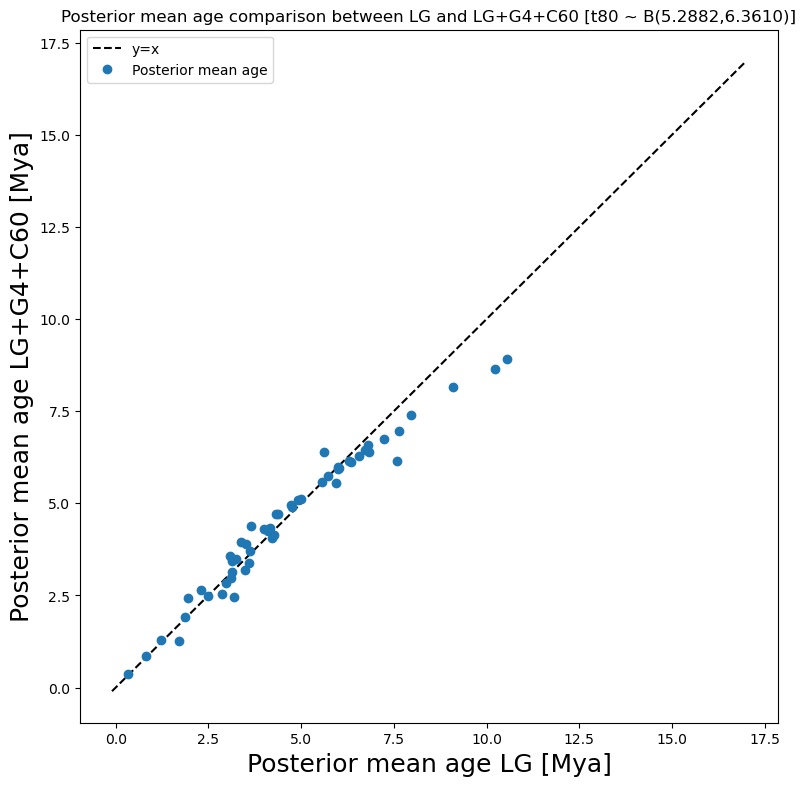

In [55]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t80 ~ B(5.2882,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_middle_scatter.png')

In [56]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')